In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp
from sklearn.feature_selection import VarianceThreshold

import seaborn as sns

from varclushi import VarClusHi

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from functools import reduce

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# importo mi propia "librería"

In [4]:
from libG28 import *

# Problema
Se necesita un modelo para identificar si el cliente será "fuga" o no.

# Lectura de Datos

In [5]:
ruta = 'data/churn/churn_data/'
lst_files = os.listdir(ruta)
lst_files = [ f for f in lst_files if f[-4:] == 'xlsx' ]

In [6]:
lst_files

['Telco_customer_churn_services.xlsx',
 'Telco_customer_churn_demographics.xlsx',
 'Telco_customer_churn_location.xlsx',
 'Telco_customer_churn_population.xlsx',
 'Telco_customer_churn.xlsx',
 'Telco_customer_churn_status.xlsx']

In [7]:
lst_dfs = []

## Archivo 1: Servicios

In [8]:
id_file = 0
df = leer_archivo(id_file)
lst_dfs.append(df)

El archivo es:  data/churn/churn_data/Telco_customer_churn_services.xlsx
Dimensiones:  (7043, 30)


,Customer_ID,Count,Quarter,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,"1,024.10"


## Archivo 2: Demographics

In [9]:
id_file = 1
df = leer_archivo(id_file)
lst_dfs.append(df)

El archivo es:  data/churn/churn_data/Telco_customer_churn_demographics.xlsx
Dimensiones:  (7043, 9)


,Customer_ID,Count,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1


## Archivo 3: Localización

In [10]:
id_file = 2
df = leer_archivo(id_file)
lst_dfs.append(df)

El archivo es:  data/churn/churn_data/Telco_customer_churn_location.xlsx
Dimensiones:  (7043, 9)


,Customer_ID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02,-118.16
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.04,-118.19


## Archivo 4: Catálogo CP

In [11]:
id_file = 3
df = leer_archivo(id_file)
lst_dfs.append(df)

El archivo es:  data/churn/churn_data/Telco_customer_churn_population.xlsx
Dimensiones:  (1671, 3)


,ID,Zip_Code,Population
0,1,90001,54492
1,2,90002,44586


## Archivo 5: Target

In [12]:
id_file = 4
df = leer_archivo(id_file)
df.rename(columns={'CustomerID':'Customer_ID'},inplace=True)
lst_dfs.append(df)

El archivo es:  data/churn/churn_data/Telco_customer_churn.xlsx
Dimensiones:  (7043, 33)


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.96,-118.27,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.06,-118.31,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [13]:
um = ['Customer_ID']

In [14]:
# def suma_g28(a,b):
#     return a+b
# reduce( suma_g28 , [1,2,3,4,5,10] )

In [15]:
df_final = reduce( merge_and_remove_duplicates , [ lst_dfs[i] for i in [0,1,2,4] ] )

In [16]:
df_final

,Customer_ID,Count,Quarter,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Partner,Tenure_Months,Device_Protection,Tech_Support,Monthly_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.02,-118.16,No,1,Yes,No,39.65,Yes,1,100,5433,Competitor offered more data
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,"1,024.10",Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.04,-118.19,Yes,8,No,No,80.65,Yes,1,69,5302,Competitor made better offer
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,"1,752.55",45.61,0,203.94,"1,910.88",Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.11,-118.23,No,18,No,No,95.45,Yes,1,81,3179,Competitor made better offer
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,"2,514.50",13.43,0,494.00,"2,995.07",Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.94,-118.33,Yes,25,Yes,No,98.50,Yes,1,88,5337,Limited range of services
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,"2,868.15",0.00,0,234.21,"3,102.36",Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.97,-118.02,Yes,37,No,No,76.50,Yes,1,67,2793,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,"1,419.40",19.31,0,"1,639.44","3,039.53",Female,30,No,No,No,No,0,United States,California,Landers,92285,"34.341737, -116.539416",34.34,-116.54,No,72,No internet service,No internet service,21.15,No,0,45,5306,NaN
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,"1,990.50",48.23,0,865.20,"2,807.47",Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,"34.667815, -117.536183",34.67,-117.54,Yes,24,Yes,Yes,84.80,No,0,59,2140,NaN
7040,2234-XADUH,1,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,"7,362.90",45.38,0,"2,135.52","9,453.04",Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,"34.559882, -115.637164",34.56,-115.64,Yes,72,Yes,No,103.20,No,0,71,5560,NaN
7041,4801-JZAZL,1,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.17,-116.86,Yes,11,No,No,29.60,No,0,59,2793,NaN


# Variables

In [17]:
um = ['Customer_ID']
tgt = ['Churn_Value']
var_fuera = ['Churn_Label','Churn_Score','CLTV','Churn_Reason']

In [18]:
df_final['Zip_Code'] = df_final['Zip_Code'].astype(str)

In [19]:
df_final.dtypes

Customer_ID                           object
Count                                  int64
Quarter                               object
Referred_a_Friend                     object
Number_of_Referrals                    int64
Tenure_in_Months                       int64
Offer                                 object
Phone_Service                         object
Avg_Monthly_Long_Distance_Charges    float64
Multiple_Lines                        object
Internet_Service                      object
Internet_Type                         object
Avg_Monthly_GB_Download                int64
Online_Security                       object
Online_Backup                         object
Device_Protection_Plan                object
Premium_Tech_Support                  object
Streaming_TV                          object
Streaming_Movies                      object
Streaming_Music                       object
Unlimited_Data                        object
Contract                              object
Paperless_

In [20]:
cols_num = []
cols_str = []

In [21]:
cols_num = df_final.select_dtypes( include = ['float'] ).columns.tolist()
cols_num = cols_num + df_final.select_dtypes( include = ['int'] ).columns.tolist()

In [22]:
cols_str = df_final.select_dtypes( include = ['object'] ).columns.tolist()

In [23]:
df_final.shape

(7043, 54)

In [24]:
cols_num = [c for c in cols_num if c not in tgt+um+var_fuera]

In [25]:
cols_str = [c for c in cols_str if c not in tgt+um+var_fuera]

In [26]:
df_final.shape

(7043, 54)

In [27]:
len(cols_num) + len(cols_str) + len(var_fuera) + 2 # ese dos es um y tgt

54

In [28]:
df_final = df_final[ um + cols_num + cols_str + tgt ]

In [29]:
df_final.sample(1)

,Customer_ID,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Count,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Number_of_Dependents,Tenure_Months,Quarter,Referred_a_Friend,Offer,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Gender,Under_30,Senior_Citizen,Married,Dependents,Country,State,City,Zip_Code,Lat_Long,Partner,Device_Protection,Tech_Support,Churn_Value
3592,2967-MXRAV,43.57,18.80,18.80,0.00,43.57,62.37,33.96,-118.27,18.80,1,9,1,0,0,29,0,1,Q3,Yes,NaN,Yes,No,No,NaN,No,No,No,No,No,No,No,No,One Year,No,Mailed Check,Male,Yes,No,Yes,No,United States,California,Los Angeles,90003,"33.964131, -118.272783",Yes,No internet service,No internet service,0


# Ingeniería de Variables

In [30]:
df_final['ratio_gb_tot'] = np.where( df_final['Total_Charges'] != 0 , df_final['Avg_Monthly_GB_Download'] / df_final['Total_Charges'] , np.nan)
df_final['ratio_tot_age'] = np.where( df_final['Age'] != 0 , df_final['Total_Charges'] / df_final['Age'] , np.nan)
df_final['ratio_long_dist_tot'] = np.where( df_final['Total_Charges'] != 0 , df_final['Avg_Monthly_Long_Distance_Charges'] / df_final['Total_Charges'] , np.nan  )
df_final['ratio_refunds_tot'] = np.where( df_final['Total_Charges'] != 0 , df_final['Total_Refunds'] / df_final['Total_Charges'] , np.nan  )
df_final['diff_rev_tot'] = df_final['Total_Revenue'] - df_final['Total_Charges']

/tmp/ipykernel_86015/1378289665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ratio_gb_tot'] = np.where( df_final['Total_Charges'] != 0 , df_final['Avg_Monthly_GB_Download'] / df_final['Total_Charges'] , np.nan)
/tmp/ipykernel_86015/1378289665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ratio_tot_age'] = np.where( df_final['Age'] != 0 , df_final['Total_Charges'] / df_final['Age'] , np.nan)
/tmp/ipykernel_86015/1378289665.py:3: SettingWithCopyWarning: 
A value is trying to b

In [31]:
df_final['ratio_01'] = np.where( df_final['Total_Refunds'] != 0 , df_final['Total_Charges'] / df_final['Total_Refunds'], np.nan  )
df_final['ratio_02'] =   np.where( df_final['Avg_Monthly_Long_Distance_Charges'] != 0 , df_final['Total_Charges'] / df_final['Avg_Monthly_Long_Distance_Charges'], np.nan  )
df_final['ratio_03'] =   np.where( df_final['Total_Extra_Data_Charges'] != 0 , df_final['Total_Charges'] / df_final['Total_Extra_Data_Charges'], np.nan  )

In [32]:
df_final = df_final.merge( df_final.groupby(['Zip_Code'])['Total_Charges'].mean().reset_index().rename(columns={'Total_Charges':'mean_Total_Charges'}) , 
                            on='Zip_Code',
                            how='left')

In [33]:
df_final['categoria_consumo'] = np.where(df_final['Total_Charges'] < df_final['mean_Total_Charges'] , 'consumo_bajo', 'consumo_alto')

In [34]:
cols_num = cols_num + ['ratio_gb_tot','ratio_tot_age','ratio_long_dist_tot','ratio_refunds_tot','diff_rev_tot'] + ['ratio_01','ratio_02','ratio_03']

In [35]:
cols_str = cols_str + ['categoria_consumo']

In [36]:
df_final.shape

(7043, 60)

In [37]:
len(cols_num), len(cols_str)

(25, 32)

# Análisis Exploratorio

## Categóricas

##### Reemplazar NaNs por "Sin categoría"

In [38]:
### La falta de información también es información para las categóricas
for c in cols_str:
    df_final[c] = df_final[c].fillna("Sin categoría")

### Análisis de Frecuencias

In [39]:
for c in cols_str:
    freq( df_final, c )

Tabla de frecuencias para la variable Quarter 

           FA   FR   FAA  FRA
Quarter                      
Q3       7043 1.00  7043 1.00 

Tabla de frecuencias para la variable Referred_a_Friend 

                     FA   FR   FAA  FRA
Referred_a_Friend                      
No                 3821 0.54  3821 0.54
Yes                3222 0.46  7043 1.00 

Tabla de frecuencias para la variable Offer 

                 FA   FR   FAA  FRA
Offer                              
Sin categoría  3877 0.55  3877 0.55
Offer B         824 0.12  4701 0.67
Offer E         805 0.11  5506 0.78
Offer D         602 0.09  6108 0.87
Offer A         520 0.07  6628 0.94
Offer C         415 0.06  7043 1.00 

Tabla de frecuencias para la variable Phone_Service 

                 FA   FR   FAA  FRA
Phone_Service                      
Yes            6361 0.90  6361 0.90
No              682 0.10  7043 1.00 

Tabla de frecuencias para la variable Multiple_Lines 

                  FA   FR   FAA  FRA
Multiple_Lin

### Normalización

In [40]:
for c in cols_str:
    df_final = norm( df_final, c,  0.03 )

/home/luis-insaite/Documents/Diplomado/G28/libG28.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace( {'CAT_PEQUEÑAS':valor} , inplace=True )
/home/luis-insaite/Documents/Diplomado/G28/libG28.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [41]:
cols_norm = [c for c in df_final.columns.tolist() if c[:2] == 'n_']

In [42]:
# ANalizo frecuencias ya con mis variables normalizadas
for c in cols_norm:
    freq( df_final, c )

Tabla de frecuencias para la variable n_Quarter 

             FA   FR   FAA  FRA
n_Quarter                      
Q3         7043 1.00  7043 1.00 

Tabla de frecuencias para la variable n_Referred_a_Friend 

                       FA   FR   FAA  FRA
n_Referred_a_Friend                      
No                   3821 0.54  3821 0.54
Yes                  3222 0.46  7043 1.00 

Tabla de frecuencias para la variable n_Offer 

                 FA   FR   FAA  FRA
n_Offer                            
Sin categoría  3877 0.55  3877 0.55
Offer B         824 0.12  4701 0.67
Offer E         805 0.11  5506 0.78
Offer D         602 0.09  6108 0.87
Offer A         520 0.07  6628 0.94
Offer C         415 0.06  7043 1.00 

Tabla de frecuencias para la variable n_Phone_Service 

                   FA   FR   FAA  FRA
n_Phone_Service                      
Yes              6361 0.90  6361 0.90
No                682 0.10  7043 1.00 

Tabla de frecuencias para la variable n_Multiple_Lines 

                 

In [43]:
len(cols_norm),cols_norm

(32,
 ['n_Quarter',
  'n_Referred_a_Friend',
  'n_Offer',
  'n_Phone_Service',
  'n_Multiple_Lines',
  'n_Internet_Service',
  'n_Internet_Type',
  'n_Online_Security',
  'n_Online_Backup',
  'n_Device_Protection_Plan',
  'n_Premium_Tech_Support',
  'n_Streaming_TV',
  'n_Streaming_Movies',
  'n_Streaming_Music',
  'n_Unlimited_Data',
  'n_Contract',
  'n_Paperless_Billing',
  'n_Payment_Method',
  'n_Gender',
  'n_Under_30',
  'n_Senior_Citizen',
  'n_Married',
  'n_Dependents',
  'n_Country',
  'n_State',
  'n_City',
  'n_Zip_Code',
  'n_Lat_Long',
  'n_Partner',
  'n_Device_Protection',
  'n_Tech_Support',
  'n_categoria_consumo'])

In [44]:
df_final.shape

(7043, 60)

In [45]:
df_final.head()

,Customer_ID,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Count,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Number_of_Dependents,Tenure_Months,Churn_Value,ratio_gb_tot,ratio_tot_age,ratio_long_dist_tot,ratio_refunds_tot,diff_rev_tot,ratio_01,ratio_02,ratio_03,mean_Total_Charges,n_Quarter,n_Referred_a_Friend,n_Offer,n_Phone_Service,n_Multiple_Lines,n_Internet_Service,n_Internet_Type,n_Online_Security,n_Online_Backup,n_Device_Protection_Plan,n_Premium_Tech_Support,n_Streaming_TV,n_Streaming_Movies,n_Streaming_Music,n_Unlimited_Data,n_Contract,n_Paperless_Billing,n_Payment_Method,n_Gender,n_Under_30,n_Senior_Citizen,n_Married,n_Dependents,n_Country,n_State,n_City,n_Zip_Code,n_Lat_Long,n_Partner,n_Device_Protection,n_Tech_Support,n_categoria_consumo
0,8779-QRDMV,0.00,39.65,39.65,0.00,0.00,59.65,34.02,-118.16,39.65,1,0,1,8,20,78,0,1,1,0.20,0.51,0.00,0.00,20.00,NaN,NaN,1.98,"1,894.74",Q3,No,Sin categoría,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,Male,No,Yes,No,No,United States,California,Los Angeles,CAT_PEQUEÑAS,CAT_PEQUEÑAS,No,Yes,No,consumo_bajo
1,7495-OOKFY,48.85,80.65,633.30,0.00,390.80,"1,024.10",34.04,-118.19,80.65,1,1,8,17,0,74,1,8,1,0.03,8.56,0.08,0.00,390.80,NaN,12.96,NaN,"3,492.69",Q3,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Female,No,Yes,Yes,Yes,United States,California,Los Angeles,CAT_PEQUEÑAS,CAT_PEQUEÑAS,Yes,No,No,consumo_bajo
2,1658-BYGOY,11.33,95.45,"1,752.55",45.61,203.94,"1,910.88",34.11,-118.23,95.45,1,0,18,52,0,71,3,18,1,0.03,24.68,0.01,0.03,158.33,38.42,154.68,NaN,"1,315.36",Q3,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Male,No,Yes,No,Yes,United States,California,Los Angeles,CAT_PEQUEÑAS,CAT_PEQUEÑAS,No,No,No,consumo_alto
3,4598-XLKNJ,19.76,98.50,"2,514.50",13.43,494.00,"2,995.07",33.94,-118.33,98.50,1,1,25,12,0,78,1,25,1,0.00,32.24,0.01,0.01,480.57,187.23,127.25,NaN,"1,397.75",Q3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Female,No,Yes,Yes,Yes,United States,California,CAT_PEQUEÑAS,CAT_PEQUEÑAS,CAT_PEQUEÑAS,Yes,Yes,No,consumo_alto
4,4846-WHAFZ,6.33,76.50,"2,868.15",0.00,234.21,"3,102.36",33.97,-118.02,76.50,1,1,37,14,0,80,1,37,1,0.00,35.85,0.00,0.00,234.21,NaN,453.10,NaN,"2,807.37",Q3,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Female,No,Yes,Yes,Yes,United States,California,CAT_PEQUEÑAS,CAT_PEQUEÑAS,CAT_PEQUEÑAS,Yes,No,No,consumo_alto


### Unarias

In [46]:
unarias = [ v for v, conteo in zip( cols_norm  , [df_final[v2].unique().shape[0] for v2 in cols_norm ] ) if conteo == 1 ]

In [47]:
len(unarias), unarias

(5, ['n_Quarter', 'n_Country', 'n_State', 'n_Zip_Code', 'n_Lat_Long'])

In [48]:
len(cols_norm)

32

In [49]:
cols_norm = [c for c in cols_norm if c not in unarias]

In [50]:
len(cols_norm)

27

## Numéricas

In [51]:
X = df_final[cols_num]

In [52]:
X.shape

(7043, 25)

In [53]:
X.head()

,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Count,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Number_of_Dependents,Tenure_Months,ratio_gb_tot,ratio_tot_age,ratio_long_dist_tot,ratio_refunds_tot,diff_rev_tot,ratio_01,ratio_02,ratio_03
0,0.00,39.65,39.65,0.00,0.00,59.65,34.02,-118.16,39.65,1,0,1,8,20,78,0,1,0.20,0.51,0.00,0.00,20.00,NaN,NaN,1.98
1,48.85,80.65,633.30,0.00,390.80,"1,024.10",34.04,-118.19,80.65,1,1,8,17,0,74,1,8,0.03,8.56,0.08,0.00,390.80,NaN,12.96,NaN
2,11.33,95.45,"1,752.55",45.61,203.94,"1,910.88",34.11,-118.23,95.45,1,0,18,52,0,71,3,18,0.03,24.68,0.01,0.03,158.33,38.42,154.68,NaN
3,19.76,98.50,"2,514.50",13.43,494.00,"2,995.07",33.94,-118.33,98.50,1,1,25,12,0,78,1,25,0.00,32.24,0.01,0.01,480.57,187.23,127.25,NaN
4,6.33,76.50,"2,868.15",0.00,234.21,"3,102.36",33.97,-118.02,76.50,1,1,37,14,0,80,1,37,0.00,35.85,0.00,0.00,234.21,NaN,453.10,NaN


### Análisis Univariado

In [54]:
X.describe()

,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Count,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Number_of_Dependents,Tenure_Months,ratio_gb_tot,ratio_tot_age,ratio_long_dist_tot,ratio_refunds_tot,diff_rev_tot,ratio_01,ratio_02,ratio_03
count,"7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00","7,043.00",525.00,"6,361.00",728.00
mean,22.96,64.76,"2,280.38",1.96,749.10,"3,034.38",36.20,-119.76,64.76,1.00,1.95,32.39,20.52,6.86,46.51,0.47,32.37,0.05,56.11,0.09,0.00,754.00,222.64,188.12,60.60
std,15.45,30.09,"2,266.22",7.90,846.66,"2,865.20",2.47,2.15,30.09,0.00,3.00,24.54,20.42,25.10,16.75,0.96,24.56,0.16,65.08,0.24,0.01,848.32,484.46,411.36,97.32
min,0.00,18.25,18.80,0.00,0.00,21.36,32.56,-124.30,18.25,1.00,0.00,1.00,0.00,0.00,19.00,0.00,0.00,0.00,0.26,0.00,0.00,-49.23,5.26,0.38,0.35
25%,9.21,35.50,400.15,0.00,70.55,605.61,33.99,-121.79,35.50,1.00,0.00,9.00,3.00,0.00,32.00,0.00,9.00,0.00,8.95,0.00,0.00,76.57,35.23,18.23,14.17
50%,22.89,70.35,"1,394.55",0.00,401.44,"2,108.64",36.21,-119.60,70.35,1.00,0.00,29.00,17.00,0.00,46.00,0.00,29.00,0.01,31.67,0.01,0.00,409.86,88.36,68.05,33.72
75%,36.39,89.85,"3,786.60",0.00,"1,191.10","4,801.15",38.16,-117.97,89.85,1.00,3.00,55.00,27.00,0.00,60.00,0.00,55.00,0.02,81.42,0.05,0.00,"1,198.20",194.79,177.97,62.67
max,49.99,118.75,"8,684.80",49.79,"3,564.72","11,979.34",41.96,-114.19,118.75,1.00,11.00,72.00,85.00,150.00,80.00,9.00,72.00,3.11,410.87,2.62,0.19,"3,583.44","4,658.62","6,193.84",796.88


array([[<Axes: title={'center': 'Avg_Monthly_Long_Distance_Charges'}>,
        <Axes: title={'center': 'Monthly_Charge'}>,
        <Axes: title={'center': 'Total_Charges'}>,
        <Axes: title={'center': 'Total_Refunds'}>,
        <Axes: title={'center': 'Total_Long_Distance_Charges'}>],
       [<Axes: title={'center': 'Total_Revenue'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Monthly_Charges'}>,
        <Axes: title={'center': 'Count'}>],
       [<Axes: title={'center': 'Number_of_Referrals'}>,
        <Axes: title={'center': 'Tenure_in_Months'}>,
        <Axes: title={'center': 'Avg_Monthly_GB_Download'}>,
        <Axes: title={'center': 'Total_Extra_Data_Charges'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Number_of_Dependents'}>,
        <Axes: title={'center': 'Tenure_Months'}>,
        <Axes: title={'center': 'ratio_gb_tot'}>,
        <Axes: title={'center': '

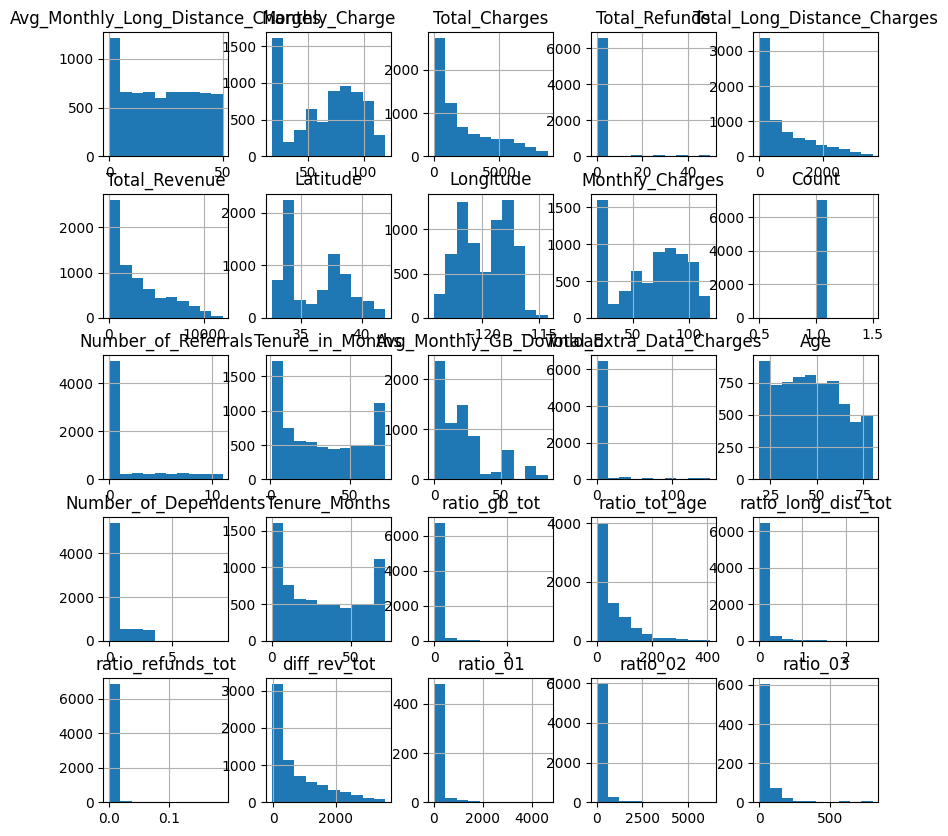

In [55]:
X.hist(figsize=(10,10))

#### Valores Ausentes

In [56]:
miss = (1 - X[cols_num].describe().T[['count']] /len(X)) *100

In [57]:
miss

,count
Avg_Monthly_Long_Distance_Charges,0.00
Monthly_Charge,0.00
Total_Charges,0.00
Total_Refunds,0.00
Total_Long_Distance_Charges,0.00
Total_Revenue,0.00
Latitude,0.00
Longitude,0.00
Monthly_Charges,0.00
Count,0.00


In [58]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((7043, 25), (55, 25), 0.007809172227743859)

#### Imputación

In [59]:
# La imputación puede ser tan compleja como la variable y/o el negocio lo requiera
im = SimpleImputer(strategy='mean') 

In [60]:
im.fit(X[cols_num])

SimpleImputer()

In [61]:
X[cols_num] = im.transform( X[cols_num] )

/tmp/ipykernel_86015/1877126865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_num] = im.transform( X[cols_num] )


In [62]:
# Valido que no tengo vacíos
X.isna().sum()

Avg_Monthly_Long_Distance_Charges    0
Monthly_Charge                       0
Total_Charges                        0
Total_Refunds                        0
Total_Long_Distance_Charges          0
Total_Revenue                        0
Latitude                             0
Longitude                            0
Monthly_Charges                      0
Count                                0
Number_of_Referrals                  0
Tenure_in_Months                     0
Avg_Monthly_GB_Download              0
Total_Extra_Data_Charges             0
Age                                  0
Number_of_Dependents                 0
Tenure_Months                        0
ratio_gb_tot                         0
ratio_tot_age                        0
ratio_long_dist_tot                  0
ratio_refunds_tot                    0
diff_rev_tot                         0
ratio_01                             0
ratio_02                             0
ratio_03                             0
dtype: int64

In [63]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((7043, 25), (7043, 25), 1.0)

#### Distribución no alterada

In [64]:
df_final.dropna().shape , X.shape

((55, 60), (7043, 25))

In [65]:
df_ks = pd.DataFrame( map( lambda x: ( x , ks_2samp( df_final[x].dropna() , X[x] ).statistic ) , cols_num  ) , columns = ['var','ks']   )

In [66]:
# Si el factor ks >0.1 la variable se considera "ROTA"
df_ks

,var,ks
0,Avg_Monthly_Long_Distance_Charges,0.00
1,Monthly_Charge,0.00
2,Total_Charges,0.00
3,Total_Refunds,0.00
4,Total_Long_Distance_Charges,0.00
5,Total_Revenue,0.00
6,Latitude,0.00
7,Longitude,0.00
8,Monthly_Charges,0.00
9,Count,0.00


In [67]:
var_rotas = df_ks.loc[ df_ks['ks'] > 0.1  ] ['var'].tolist()

In [68]:
cols_num = [c for c in cols_num if c not in var_rotas]

In [69]:
len(cols_num),cols_num

(23,
 ['Avg_Monthly_Long_Distance_Charges',
  'Monthly_Charge',
  'Total_Charges',
  'Total_Refunds',
  'Total_Long_Distance_Charges',
  'Total_Revenue',
  'Latitude',
  'Longitude',
  'Monthly_Charges',
  'Count',
  'Number_of_Referrals',
  'Tenure_in_Months',
  'Avg_Monthly_GB_Download',
  'Total_Extra_Data_Charges',
  'Age',
  'Number_of_Dependents',
  'Tenure_Months',
  'ratio_gb_tot',
  'ratio_tot_age',
  'ratio_long_dist_tot',
  'ratio_refunds_tot',
  'diff_rev_tot',
  'ratio_02'])

#### Varianza

In [70]:
vt = VarianceThreshold(threshold=1.0)

In [71]:
vt.fit(X[cols_num])

VarianceThreshold(threshold=1.0)

In [72]:
sin_varianza = [ v for v, u in zip( cols_num , vt.get_support() ) if not(u) ]

In [73]:
len(sin_varianza), sin_varianza

(5,
 ['Count',
  'Number_of_Dependents',
  'ratio_gb_tot',
  'ratio_long_dist_tot',
  'ratio_refunds_tot'])

array([[<Axes: title={'center': 'Count'}>,
        <Axes: title={'center': 'Number_of_Dependents'}>],
       [<Axes: title={'center': 'ratio_gb_tot'}>,
        <Axes: title={'center': 'ratio_long_dist_tot'}>],
       [<Axes: title={'center': 'ratio_refunds_tot'}>, <Axes: >]],
      dtype=object)

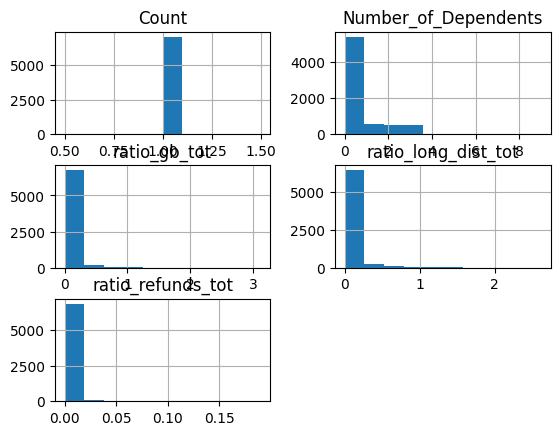

In [74]:
df_final[sin_varianza].hist()

In [75]:
cols_num = [v for v in cols_num if v not in sin_varianza]

In [76]:
len(cols_num)

18

#### Extremos

In [77]:
ext = X[cols_num].describe( percentiles=[.01,.99] ).T[['1%','99%']].reset_index()

for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)
    
X['ext'] = X.filter(like='ol_').max(axis=1)

X.drop(X.filter(like='ol_').columns, axis=1, inplace=True)

X['ext'].value_counts(True)*100

/tmp/ipykernel_86015/3361347439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)
/tmp/ipykernel_86015/3361347439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)
/tmp/ipykernel_86015/3361347439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

ext
0   84.55
1   15.45
Name: proportion, dtype: float64

In [78]:
X[um]  = df_final[um]

/tmp/ipykernel_86015/3113751835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[um]  = df_final[um]


In [79]:
# Selecciono los que NO son extremos o Eliminar extremos
X = X.loc[X['ext'] == 0].reset_index(drop=True).drop(['ext'],axis=1)
#X = X.loc[X['ext'] != 1].reset_index(drop=True).drop(['ext'],axis=1)

In [80]:
print(X.shape)
display(X.head())

(5955, 26)


,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Count,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Number_of_Dependents,Tenure_Months,ratio_gb_tot,ratio_tot_age,ratio_long_dist_tot,ratio_refunds_tot,diff_rev_tot,ratio_01,ratio_02,ratio_03,Customer_ID
0,0.00,39.65,39.65,0.00,0.00,59.65,34.02,-118.16,39.65,1.00,0.00,1.00,8.00,20.00,78.00,0.00,1.00,0.20,0.51,0.00,0.00,20.00,222.64,188.12,1.98,8779-QRDMV
1,48.85,80.65,633.30,0.00,390.80,"1,024.10",34.04,-118.19,80.65,1.00,1.00,8.00,17.00,0.00,74.00,1.00,8.00,0.03,8.56,0.08,0.00,390.80,222.64,12.96,60.60,7495-OOKFY
2,19.76,98.50,"2,514.50",13.43,494.00,"2,995.07",33.94,-118.33,98.50,1.00,1.00,25.00,12.00,0.00,78.00,1.00,25.00,0.00,32.24,0.01,0.01,480.57,187.23,127.25,60.60,4598-XLKNJ
3,3.33,78.05,"2,135.50",0.00,89.91,"2,235.41",33.99,-118.09,78.05,1.00,0.00,27.00,18.00,10.00,72.00,1.00,27.00,0.01,29.66,0.00,0.00,99.91,222.64,641.29,213.55,4412-YLTKF
4,15.28,70.45,70.45,0.00,15.28,85.73,33.79,-118.07,70.45,1.00,1.00,1.00,30.00,0.00,76.00,2.00,1.00,0.43,0.93,0.22,0.00,15.28,222.64,4.61,60.60,0390-DCFDQ


### Análisis Bivariado

In [81]:
X[cols_num].corr()

,Avg_Monthly_Long_Distance_Charges,Monthly_Charge,Total_Charges,Total_Refunds,Total_Long_Distance_Charges,Total_Revenue,Latitude,Longitude,Monthly_Charges,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_GB_Download,Total_Extra_Data_Charges,Age,Tenure_Months,ratio_tot_age,diff_rev_tot,ratio_02
Avg_Monthly_Long_Distance_Charges,1.00,0.15,0.06,0.02,0.58,0.22,0.01,-0.01,0.15,0.00,-0.01,-0.02,-0.01,-0.01,-0.01,0.05,0.58,-0.44
Monthly_Charge,0.15,1.00,0.60,0.03,0.19,0.53,-0.03,0.03,1.00,-0.01,0.15,0.37,0.12,0.17,0.15,0.50,0.19,0.29
Total_Charges,0.06,0.60,1.00,0.04,0.61,0.97,0.00,-0.00,0.60,0.24,0.81,0.18,0.11,0.09,0.81,0.86,0.61,0.50
Total_Refunds,0.02,0.03,0.04,1.00,0.06,0.05,-0.01,-0.00,0.03,0.03,0.05,-0.01,0.01,0.02,0.05,0.03,0.05,0.02
Total_Long_Distance_Charges,0.58,0.19,0.61,0.06,1.00,0.78,0.01,-0.01,0.19,0.22,0.67,-0.02,0.04,0.01,0.67,0.54,1.00,-0.06
Total_Revenue,0.22,0.53,0.97,0.05,0.78,1.00,0.01,-0.01,0.53,0.25,0.84,0.14,0.11,0.07,0.84,0.84,0.78,0.38
Latitude,0.01,-0.03,0.00,-0.01,0.01,0.01,1.00,-0.89,-0.03,0.02,0.02,-0.03,-0.01,-0.00,0.02,-0.00,0.01,-0.02
Longitude,-0.01,0.03,-0.00,-0.00,-0.01,-0.01,-0.89,1.00,0.03,-0.01,-0.02,0.03,0.01,0.00,-0.02,-0.00,-0.01,0.02
Monthly_Charges,0.15,1.00,0.60,0.03,0.19,0.53,-0.03,0.03,1.00,-0.01,0.15,0.37,0.12,0.17,0.15,0.50,0.19,0.29
Number_of_Referrals,0.00,-0.01,0.24,0.03,0.22,0.25,0.02,-0.01,-0.01,1.00,0.32,0.02,-0.00,-0.02,0.32,0.22,0.22,0.10


In [82]:
import matplotlib.pyplot as plt

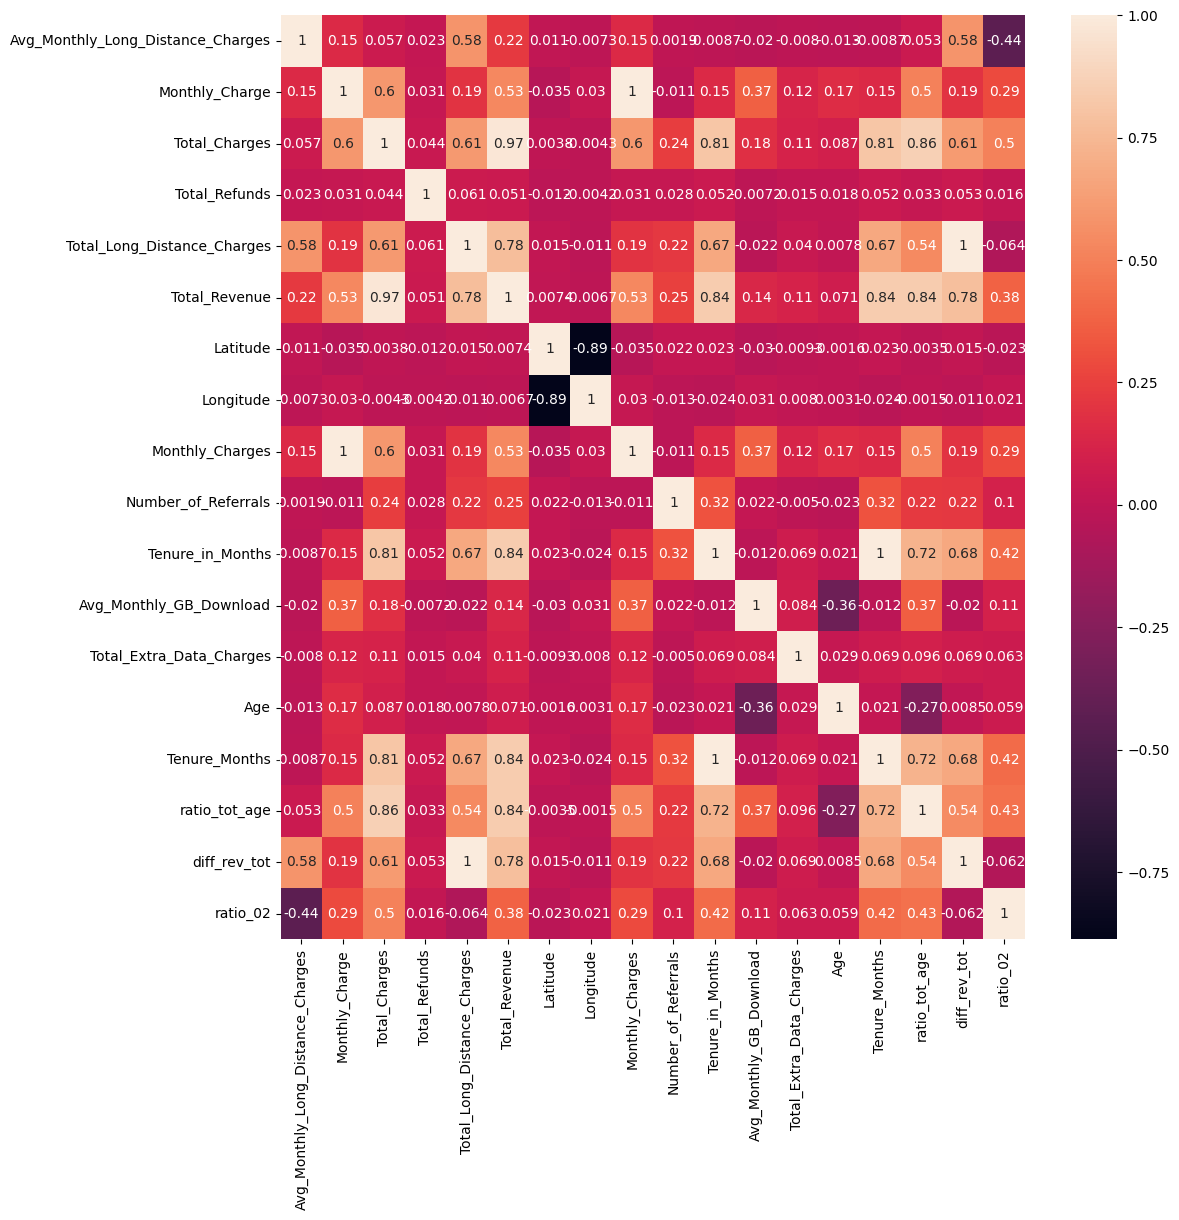

In [83]:
corr_df = X[cols_num].corr()
plt.figure(figsize=(12,12))
sns.heatmap( corr_df , annot=True )
plt.show()

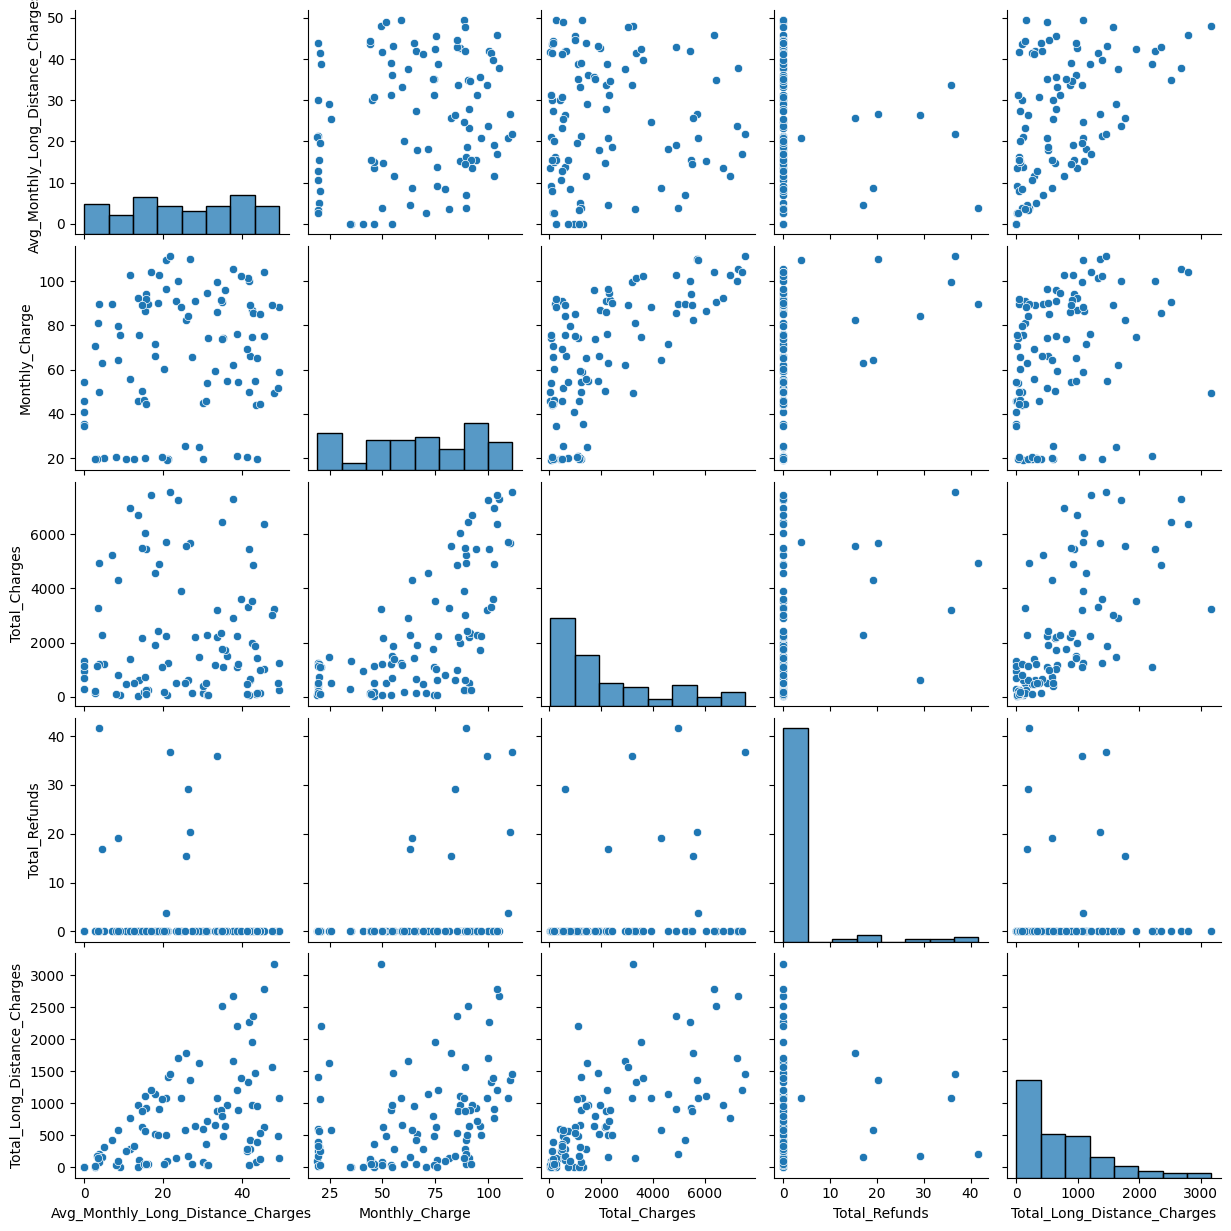

In [84]:
sns.pairplot( X[cols_num[:5]].sample(100) )

### Multicolinealidad

In [85]:
vc = VarClusHi(df=X[cols_num], feat_list=cols_num)
vc.varclus()

In [86]:
rs = vc.rsquare
rs = rs.sort_values( by = ['Cluster','RS_Ratio'] ,ascending=[1,1] ).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount() + 1
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,Total_Revenue,0.92,0.46,0.15,1
1,0,Tenure_in_Months,0.88,0.28,0.17,2
2,0,Tenure_Months,0.88,0.28,0.17,3
3,0,Total_Charges,0.90,0.44,0.18,4
4,0,ratio_tot_age,0.77,0.31,0.33,5
5,0,Number_of_Referrals,0.13,0.03,0.90,6
6,1,Monthly_Charge,0.94,0.16,0.07,1
7,1,Monthly_Charges,0.94,0.16,0.07,2
8,1,ratio_02,0.24,0.21,0.96,3
9,1,Total_Extra_Data_Charges,0.05,0.01,0.96,4


In [87]:
cols_num = rs.loc[ rs['id'] == 1  ]['Variable'].tolist()

In [88]:
len(cols_num),cols_num

(5,
 ['Total_Revenue',
  'Monthly_Charge',
  'Longitude',
  'Total_Long_Distance_Charges',
  'Age'])

array([[<Axes: title={'center': 'Total_Revenue'}>,
        <Axes: title={'center': 'Monthly_Charge'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Total_Long_Distance_Charges'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

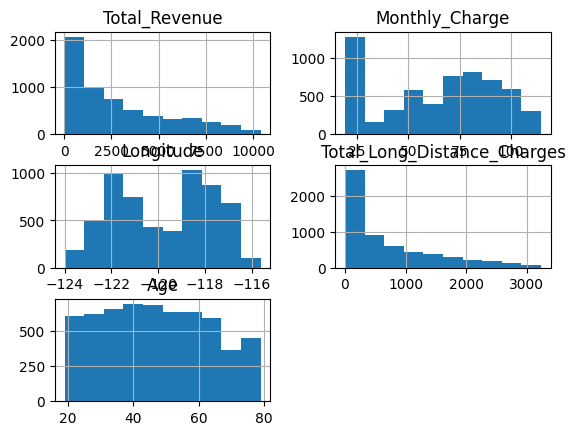

In [89]:
X[cols_num].hist()

### Discretizar

In [90]:
for c in cols_num:
    print("Discretizando columna: ",c)
    for k in range(2,5):
        X = discretizar( X, c , k )

Discretizando columna:  Total_Revenue
Discretizando columna:  Monthly_Charge
Discretizando columna:  Longitude
Discretizando columna:  Total_Long_Distance_Charges
Discretizando columna:  Age


In [91]:
cols_dis = X.filter(like='d_').columns.tolist()

In [94]:
#Para validar que se hicieron bien los bines
for c in cols_dis:
    print(X[c].value_counts(1)*100)
    print("\n")

d_Total_Revenue_2
(31.108999999999998, 2011.4]   50.01
(2011.4, 10385.38]             49.99
Name: proportion, dtype: float64


d_Total_Revenue_3
(31.108999999999998, 1002.313]   33.33
(1002.313, 3434.833]             33.33
(3434.833, 10385.38]             33.33
Name: proportion, dtype: float64


d_Total_Revenue_4
(31.108999999999998, 631.255]   25.00
(631.255, 2011.4]               25.00
(4511.9, 10385.38]              25.00
(2011.4, 4511.9]                24.99
Name: proportion, dtype: float64


d_Monthly_Charge_2
(19.198999999999998, 70.2]   50.04
(70.2, 114.7]                49.96
Name: proportion, dtype: float64


d_Monthly_Charge_3
(19.198999999999998, 50.8]   33.42
(81.85, 114.7]               33.32
(50.8, 81.85]                33.27
Name: proportion, dtype: float64


d_Monthly_Charge_4
(19.198999999999998, 40.1]   25.02
(40.1, 70.2]                 25.02
(89.075, 114.7]              25.00
(70.2, 89.075]               24.95
Name: proportion, dtype: float64


d_Longitude_2
(-124.0

### Poder predictivo

In [95]:
# Junto mis variables discretizadas y normalizadas
X = X[um + cols_dis].merge( df_final[ um + cols_norm ] , on = um , how='left' )

In [97]:
y = X[um].merge( df_final[um+tgt] , on=um , how='left' )

In [98]:
X.shape, y.shape

((5955, 43), (5955, 2))

#### Partición de datos

In [100]:
Xt, Xv, yt, yv = train_test_split( X, y, train_size=0.7 )

In [101]:
Xt.shape , yt.shape, Xv.shape, yv.shape

((4168, 43), (4168, 2), (1787, 43), (1787, 2))

In [102]:
Xt =  Xt.merge(  yt , on = um , how='inner' ).reset_index(drop=True)

## Mejores variables discretizadas

In [103]:
iv =  pd.DataFrame( map( lambda v: calculo_iv( Xt , v , tgt , um  ) , cols_dis ) , columns= ['variable','iv']  )

In [105]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join( x.split('_')[1:-1] ) )

In [107]:
iv = iv.sort_values( by=['raiz','iv'],ascending=[1,0] ).reset_index(drop=True)
iv['id'] = iv.groupby( 'raiz' ).cumcount()+1

In [109]:
best_dis = iv.loc[iv.id == 1]['variable'].tolist()

In [110]:
best_dis

['d_Age_4',
 'd_Longitude_4',
 'd_Monthly_Charge_4',
 'd_Total_Long_Distance_Charges_4',
 'd_Total_Revenue_4']

## Mejores variables normalizadas

In [111]:
ivd =  pd.DataFrame( map( lambda v: calculo_iv( Xt , v , tgt , um  ) , cols_norm ) , columns= ['variable','iv']  )

In [114]:
ivd.sort_values('iv',ascending=False).reset_index(drop=True)

,variable,iv
0,n_Contract,1.51
1,n_Tech_Support,0.84
2,n_Internet_Type,0.78
3,n_Device_Protection,0.63
4,n_Internet_Service,0.53
5,n_Dependents,0.50
6,n_Offer,0.40
7,n_Payment_Method,0.29
8,n_Paperless_Billing,0.24
9,n_Unlimited_Data,0.18


In [115]:
iv = pd.concat( [iv.loc[iv.id == 1] , ivd] , ignore_index=True )

In [116]:
iv = iv.sort_values( by=['iv'],ascending=[0] ).reset_index(drop=True)

In [118]:
cols_best = iv.loc[ (iv['iv'] > 0.01 ) & (iv['iv'] < 0.8) ]['variable'].tolist()

In [120]:
len(cols_best), cols_best

(27,
 ['n_Internet_Type',
  'n_Device_Protection',
  'n_Internet_Service',
  'n_Dependents',
  'd_Monthly_Charge_4',
  'n_Offer',
  'd_Total_Long_Distance_Charges_4',
  'd_Total_Revenue_4',
  'n_Payment_Method',
  'n_Paperless_Billing',
  'n_Unlimited_Data',
  'n_City',
  'n_Online_Security',
  'n_Premium_Tech_Support',
  'n_Senior_Citizen',
  'n_categoria_consumo',
  'n_Married',
  'n_Partner',
  'n_Referred_a_Friend',
  'd_Age_4',
  'n_Streaming_Movies',
  'n_Streaming_TV',
  'd_Longitude_4',
  'n_Streaming_Music',
  'n_Online_Backup',
  'n_Multiple_Lines',
  'n_Device_Protection_Plan'])

# Transformación WoE

In [122]:
X[cols_best].head()

,n_Internet_Type,n_Device_Protection,n_Internet_Service,n_Dependents,d_Monthly_Charge_4,n_Offer,d_Total_Long_Distance_Charges_4,d_Total_Revenue_4,n_Payment_Method,n_Paperless_Billing,n_Unlimited_Data,n_City,n_Online_Security,n_Premium_Tech_Support,n_Senior_Citizen,n_categoria_consumo,n_Married,n_Partner,n_Referred_a_Friend,d_Age_4,n_Streaming_Movies,n_Streaming_TV,d_Longitude_4,n_Streaming_Music,n_Online_Backup,n_Multiple_Lines,n_Device_Protection_Plan
0,DSL,Yes,Yes,No,"(19.198999999999998, 40.1]",Sin categoría,"(-0.001, 78.79]","(31.108999999999998, 631.255]",Bank Withdrawal,Yes,No,Los Angeles,No,No,Yes,consumo_bajo,No,No,No,"(60.0, 79.0]",Yes,No,"(-119.623, -118.015]",No,No,No,Yes
1,Fiber Optic,No,Yes,Yes,"(70.2, 89.075]",Offer E,"(78.79, 401.44]","(631.255, 2011.4]",Credit Card,Yes,Yes,Los Angeles,No,No,Yes,consumo_bajo,Yes,Yes,Yes,"(60.0, 79.0]",No,No,"(-119.623, -118.015]",No,Yes,Yes,No
2,Fiber Optic,Yes,Yes,Yes,"(89.075, 114.7]",Offer C,"(401.44, 1141.4]","(2011.4, 4511.9]",Bank Withdrawal,Yes,Yes,CAT_PEQUEÑAS,No,No,Yes,consumo_alto,Yes,Yes,Yes,"(60.0, 79.0]",Yes,Yes,"(-119.623, -118.015]",No,Yes,No,Yes
3,Fiber Optic,Yes,Yes,Yes,"(70.2, 89.075]",Offer C,"(78.79, 401.44]","(2011.4, 4511.9]",Bank Withdrawal,Yes,No,CAT_PEQUEÑAS,No,No,Yes,consumo_alto,No,No,No,"(60.0, 79.0]",No,No,"(-119.623, -118.015]",No,No,Yes,Yes
4,Fiber Optic,No,Yes,Yes,"(70.2, 89.075]",Offer E,"(-0.001, 78.79]","(31.108999999999998, 631.255]",Mailed Check,Yes,Yes,CAT_PEQUEÑAS,No,No,Yes,consumo_bajo,Yes,Yes,Yes,"(60.0, 79.0]",No,No,"(-119.623, -118.015]",No,No,No,No


In [171]:
X.shape, y.shape

((5955, 43), (5955, 2))

In [172]:
Xt, Xv, yt, yv =  train_test_split(X,y,train_size = 0.7)

In [173]:
Xt.shape, yt.shape , Xv.shape , yv.shape

((4168, 43), (4168, 2), (1787, 43), (1787, 2))

In [174]:
Xt = Xt.merge( yt, on=um , how='inner'  ).reset_index(drop=True)

### Mapa WoE

In [175]:
mapa_woe = list( map( lambda v: codificacion_woe( Xt, v, tgt, um[0] ) , cols_best ) )

In [176]:
mapa_woe

[('n_Internet_Type',
  {'Cable': 0.06652368708856202,
   'DSL': 0.5303237860172761,
   'Fiber Optic': -0.7235182784362442,
   'Sin categoría': 1.9923670046206234}),
 ('n_Device_Protection',
  {'No': -0.5437288349568774,
   'No internet service': 1.9923670046206234,
   'Yes': 0.1441399454702298}),
 ('n_Internet_Service',
  {'No': 1.9923670046206234, 'Yes': -0.2788532714378181}),
 ('n_Dependents', {'No': -0.29070133364779166, 'Yes': 1.7376950376166822}),
 ('d_Monthly_Charge_4',
  {'(19.198999999999998, 40.1]': 1.3270069220793352,
   '(40.1, 70.2]': 0.1209489647838586,
   '(70.2, 89.075]': -0.5504472682536027,
   '(89.075, 114.7]': -0.3897853065443637}),
 ('n_Offer',
  {'Offer A': 1.5820297796884586,
   'Offer B': 0.9004702143009012,
   'Offer C': 0.2900460980398093,
   'Offer D': 0.013563215818651797,
   'Offer E': -1.1659849055198772,
   'Sin categoría': -0.0016891211451377022}),
 ('d_Total_Long_Distance_Charges_4',
  {'(-0.001, 78.79]': -0.6761035507347531,
   '(1141.4, 3234.24]': 0.96

In [177]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

/tmp/ipykernel_86015/2046403577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xt[f'w_{v}'] = Xt[v].replace(mapa)
/tmp/ipykernel_86015/2046403577.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xv[f'w_{v}'] = Xv[v].replace(mapa)
/tmp/ipykernel_86015/2046403577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [178]:
cols_woe = Xt.filter(like='w_').columns.tolist()

In [179]:
len(cols_woe)

27

# TAD

In [180]:
tad = Xt[um+cols_woe].merge( yt , on=um , how='inner' ).reset_index(drop=True)

In [181]:
tad_v = Xv[um+cols_woe].merge( yv , on=um , how='inner' ).reset_index(drop=True)

In [182]:
tad.shape

(4168, 29)

In [183]:
tad_v.shape

(1787, 29)

In [184]:
tad.to_parquet("resultados/churn_telco.parquet")

In [185]:
tad

,Customer_ID,w_n_Internet_Type,w_n_Device_Protection,w_n_Internet_Service,w_n_Dependents,w_d_Monthly_Charge_4,w_n_Offer,w_d_Total_Long_Distance_Charges_4,w_d_Total_Revenue_4,w_n_Payment_Method,w_n_Paperless_Billing,w_n_Unlimited_Data,w_n_City,w_n_Online_Security,w_n_Premium_Tech_Support,w_n_Senior_Citizen,w_n_categoria_consumo,w_n_Married,w_n_Partner,w_n_Referred_a_Friend,w_d_Age_4,w_n_Streaming_Movies,w_n_Streaming_TV,w_d_Longitude_4,w_n_Streaming_Music,w_n_Online_Backup,w_n_Multiple_Lines,w_n_Device_Protection_Plan,Churn_Value
0,7602-DBTOU,1.99,1.99,1.99,-0.29,1.33,-0.00,0.96,0.45,0.88,0.64,0.71,0.09,-0.21,-0.21,0.14,0.45,0.37,0.37,0.38,0.12,0.14,0.14,0.04,0.12,-0.10,0.12,-0.07,0
1,2159-TURXX,1.99,1.99,1.99,-0.29,1.33,-0.00,-0.33,-0.86,0.88,0.64,0.71,0.09,-0.21,-0.21,0.14,-0.25,-0.30,-0.30,-0.27,0.20,0.14,0.14,0.04,0.12,-0.10,0.12,-0.07,0
2,9480-BQJEI,-0.72,-0.54,-0.28,-0.29,-0.39,-0.00,0.96,0.74,-0.39,-0.33,-0.26,0.09,0.73,-0.21,0.14,0.45,-0.30,-0.30,-0.27,0.12,-0.21,0.14,0.09,-0.21,0.22,-0.16,-0.07,0
3,1456-TWCGB,0.07,-0.54,-0.28,-0.29,0.12,-0.00,-0.33,-0.86,-0.51,0.64,-0.26,0.09,-0.21,-0.21,0.14,-0.25,-0.30,-0.30,-0.27,0.12,0.14,0.14,0.17,0.12,0.22,0.12,-0.07,0
4,7137-RYLPP,-0.72,-0.54,-0.28,-0.29,-0.55,0.29,0.96,0.74,-0.39,-0.33,-0.26,0.09,-0.21,-0.21,-0.65,0.45,0.37,0.37,0.38,-0.42,0.14,-0.21,0.04,0.12,-0.10,-0.16,-0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,7450-NWRTR,-0.72,0.14,-0.28,-0.29,-0.39,-0.00,-0.33,-0.01,-0.39,-0.33,-0.26,-1.84,-0.21,-0.21,-0.65,-0.25,-0.30,-0.30,-0.27,-0.42,-0.21,-0.21,-0.27,0.12,-0.10,-0.16,0.14,1
4164,4695-VADHF,0.53,0.14,-0.28,-0.29,0.12,-0.00,-0.68,-0.01,-0.39,0.64,-0.26,0.09,-0.21,-0.21,0.14,-0.25,0.37,0.37,0.38,0.12,-0.21,0.14,0.04,-0.21,-0.10,0.12,0.14,1
4165,1452-UZOSF,-0.72,0.14,-0.28,1.74,-0.39,1.58,0.40,0.74,0.88,-0.33,-0.26,0.09,0.73,0.71,0.14,0.45,0.37,0.37,0.38,0.20,0.14,-0.21,0.04,0.12,0.22,-0.16,0.14,0
4166,9944-AEXBM,-0.72,-0.54,-0.28,-0.29,-0.55,-0.00,0.96,0.45,-0.39,-0.33,-0.26,0.09,-0.21,-0.21,0.14,0.45,-0.30,-0.30,-0.27,0.12,-0.21,0.14,0.09,-0.21,-0.10,-0.16,-0.07,0


In [186]:
len(cols_woe)

27

# Modelo

In [187]:
modelo_churn = LogisticRegression(n_jobs=-1)

In [188]:
modelo_churn.fit(Xt[cols_woe],yt[tgt])

/home/luis-insaite/Documents/Entornos/envG28/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(n_jobs=-1)

In [189]:
modelo_churn.coef_ , modelo_churn.intercept_

(array([[-0.73682024, -0.11519029, -0.04033228, -0.75314602, -0.18632034,
         -0.30372679, -0.28847424, -0.9661544 , -0.53850073, -0.36152523,
          0.14893931, -0.94472611, -0.49877141, -0.69635223, -0.14358807,
         -0.2561142 ,  0.12721018,  0.12721018, -0.01606244, -0.08173462,
         -0.49896365, -0.44575944,  0.10494894, -0.58616122, -0.53922441,
         -1.39780225, -0.02466209]]),
 array([-0.95425253]))

## Evaluar modelo

In [190]:
pd.DataFrame(modelo_churn.predict_proba( Xv[cols_woe] ))

,0,1
0,0.78,0.22
1,0.91,0.09
2,0.04,0.96
3,0.97,0.03
4,0.89,0.11
...,...,...
1782,0.99,0.01
1783,0.98,0.02
1784,0.97,0.03
1785,0.65,0.35


In [191]:
Xv['y2^'] = pd.DataFrame(modelo_churn.predict( Xv[cols_woe] ))

In [192]:
Xv['y'] = yv[tgt]

In [193]:
Xv['y2^'].value_counts(1)*100

y2^
0.00   80.62
1.00   19.38
Name: proportion, dtype: float64

In [194]:
Xv['y'].value_counts(1)*100

y
0   71.74
1   28.26
Name: proportion, dtype: float64

In [195]:
#Xv = Xv.loc[~Xv['y2^'].isna()].reset_index(drop=True)

In [196]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = yv[tgt]
y_scores = modelo_churn.predict_proba(Xv[cols_woe])[:,1]

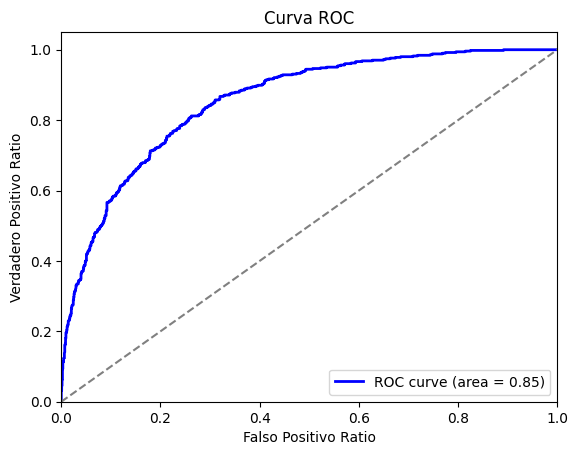

In [197]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [199]:
metricas(modelo_churn , Xv[cols_woe], yv[tgt])

 Métricas para modelo de clasificación: 

 Valor ROC : 0.854
 Valor ACC : 0.801

 Matriz de confusión:  
 [[1180  102]
 [ 253  252]]
